# Xarxa neuronal

In [2]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.optimizers import SGD
from sklearn.model_selection import StratifiedKFold
from scipy.stats import uniform as sp_rand
from scipy.stats import randint
from time import time
from sklearn import preprocessing

Using TensorFlow backend.


## Consum diari total multivariate multi-step

In [3]:
daily=pd.read_csv('C:/Users/Laura/Desktop/Smart meters London/workspace R/Dades netes/Final/daily_agr_mitjanaLlarPerDia_tot.csv')
daily.head(5)

,date,apparentTemperatureMax,apparentTemperatureMin,sunsetTimeHour,weekday,season,cloudCover,humidity,visibility,month,dewPoint,pressure,energy_sum
0,2014-02-08,5.67,2.19,17,6,winter,0.47,0.77,11.20,2,3.99,979.25,11.569300
1,2013-12-24,11.93,2.68,15,2,winter,0.40,0.81,10.86,12,5.42,979.52,11.981672
2,2012-11-01,11.46,0.85,16,4,autumn,0.44,0.85,12.54,11,5.06,979.63,10.781689
3,2014-02-05,5.86,1.03,16,3,winter,0.73,0.77,10.91,2,4.06,982.20,11.415105
4,2012-04-17,10.01,2.76,19,2,spring,0.60,0.87,11.86,4,5.74,982.22,10.617443


In [4]:
#Ens quedem amb date i energy_sum, ordenem valors per data i resetejem index
daily_dia=daily[['date','energy_sum','apparentTemperatureMax','apparentTemperatureMin','humidity','weekday' ]].sort_values(by=['date']).reset_index()
daily_dia.head(5)


,index,date,energy_sum,apparentTemperatureMax,apparentTemperatureMin,humidity,weekday
0,735,2011-11-23,6.952692,10.36,2.18,0.93,3
1,736,2011-11-24,8.536480,12.93,7.01,0.89,4
2,682,2011-11-25,9.499781,13.03,4.84,0.79,5
3,713,2011-11-26,10.267707,12.96,4.69,0.81,6
4,609,2011-11-27,10.850805,13.54,2.94,0.72,7


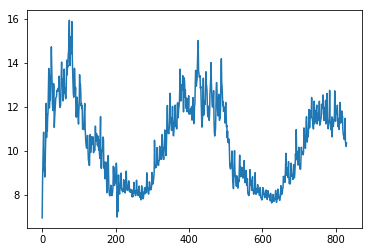

In [18]:
plt.plot(daily_dia.energy_sum )

In [5]:
daily_dia['y+1']=daily_dia['energy_sum'].shift(-1)
daily_dia['y+2']=daily_dia['energy_sum'].shift(-2)
daily_dia['y+3']=daily_dia['energy_sum'].shift(-3)
daily_dia['y+4']=daily_dia['energy_sum'].shift(-4)
daily_dia['y+5']=daily_dia['energy_sum'].shift(-5)
daily_dia['y+6']=daily_dia['energy_sum'].shift(-6)
daily_dia['y+7']=daily_dia['energy_sum'].shift(-7)
daily_dia['y+8']=daily_dia['energy_sum'].shift(-8)
daily_dia['y+9']=daily_dia['energy_sum'].shift(-9)
daily_dia['y+10']=daily_dia['energy_sum'].shift(-10)
daily_dia['y+11']=daily_dia['energy_sum'].shift(-11)
daily_dia['y+12']=daily_dia['energy_sum'].shift(-12)
daily_dia['y+13']=daily_dia['energy_sum'].shift(-13)
daily_dia['y+14']=daily_dia['energy_sum'].shift(-14)
daily_dia['y+15']=daily_dia['energy_sum'].shift(-15)
daily_dia['y+16']=daily_dia['energy_sum'].shift(-16)
daily_dia['y+17']=daily_dia['energy_sum'].shift(-17)
daily_dia['y+18']=daily_dia['energy_sum'].shift(-18)
daily_dia['y+19']=daily_dia['energy_sum'].shift(-19)
daily_dia['y+20']=daily_dia['energy_sum'].shift(-20)
daily_dia['y+21']=daily_dia['energy_sum'].shift(-21)
daily_dia['y+22']=daily_dia['energy_sum'].shift(-22)
daily_dia['y+23']=daily_dia['energy_sum'].shift(-23)
daily_dia['y+24']=daily_dia['energy_sum'].shift(-24)
daily_dia['y+25']=daily_dia['energy_sum'].shift(-25)
daily_dia['y+26']=daily_dia['energy_sum'].shift(-26)
daily_dia['y+27']=daily_dia['energy_sum'].shift(-27)
daily_dia['y+28']=daily_dia['energy_sum'].shift(-28)
daily_dia['y+29']=daily_dia['energy_sum'].shift(-29)
daily_dia['y+30']=daily_dia['energy_sum'].shift(-30)



daily_dia['t-1']=daily_dia['energy_sum'].shift(1)
daily_dia['t-2']=daily_dia['energy_sum'].shift(2)
daily_dia['t-3']=daily_dia['energy_sum'].shift(3)
daily_dia['t-4']=daily_dia['energy_sum'].shift(4)
daily_dia['t-5']=daily_dia['energy_sum'].shift(5)
daily_dia['t-6']=daily_dia['energy_sum'].shift(6)
daily_dia['t-7']=daily_dia['energy_sum'].shift(7)
daily_dia['t-8']=daily_dia['energy_sum'].shift(8)
daily_dia['t-9']=daily_dia['energy_sum'].shift(9)
daily_dia['t-10']=daily_dia['energy_sum'].shift(10)
daily_dia['t-11']=daily_dia['energy_sum'].shift(11)
daily_dia['t-12']=daily_dia['energy_sum'].shift(12)
daily_dia['t-13']=daily_dia['energy_sum'].shift(13)
daily_dia['t-14']=daily_dia['energy_sum'].shift(14)

daily_dia['temp(t-1)']=daily_dia['apparentTemperatureMax'].shift(1)
daily_dia['temp(t-2)']=daily_dia['apparentTemperatureMax'].shift(2)
daily_dia['temp(t-3)']=daily_dia['apparentTemperatureMax'].shift(3)
daily_dia['temp(t-4)']=daily_dia['apparentTemperatureMax'].shift(4)
daily_dia['temp(t-5)']=daily_dia['apparentTemperatureMax'].shift(5)
daily_dia['temp(t-6)']=daily_dia['apparentTemperatureMax'].shift(6)
daily_dia['temp(t-7)']=daily_dia['apparentTemperatureMax'].shift(7)
daily_dia['temp(t-8)']=daily_dia['apparentTemperatureMax'].shift(8)
daily_dia['temp(t-9)']=daily_dia['apparentTemperatureMax'].shift(9)
daily_dia['temp(t-10)']=daily_dia['apparentTemperatureMax'].shift(10)
daily_dia['temp(t-11)']=daily_dia['apparentTemperatureMax'].shift(11)
daily_dia['temp(t-12)']=daily_dia['apparentTemperatureMax'].shift(12)
daily_dia['temp(t-13)']=daily_dia['apparentTemperatureMax'].shift(13)
daily_dia['temp(t-14)']=daily_dia['apparentTemperatureMax'].shift(14)

daily_dia['tempmin(t-1)']=daily_dia['apparentTemperatureMin'].shift(1)
daily_dia['tempmin(t-2)']=daily_dia['apparentTemperatureMin'].shift(2)
daily_dia['tempmin(t-3)']=daily_dia['apparentTemperatureMin'].shift(3)
daily_dia['tempmin(t-4)']=daily_dia['apparentTemperatureMin'].shift(4)
daily_dia['tempmin(t-5)']=daily_dia['apparentTemperatureMin'].shift(5)
daily_dia['tempmin(t-6)']=daily_dia['apparentTemperatureMin'].shift(6)
daily_dia['tempmin(t-7)']=daily_dia['apparentTemperatureMin'].shift(7)
daily_dia['tempmin(t-8)']=daily_dia['apparentTemperatureMin'].shift(8)
daily_dia['tempmin(t-9)']=daily_dia['apparentTemperatureMin'].shift(9)
daily_dia['tempmin(t-10)']=daily_dia['apparentTemperatureMin'].shift(10)
daily_dia['tempmin(t-11)']=daily_dia['apparentTemperatureMin'].shift(11)
daily_dia['tempmin(t-12)']=daily_dia['apparentTemperatureMin'].shift(12)
daily_dia['tempmin(t-13)']=daily_dia['apparentTemperatureMin'].shift(13)
daily_dia['tempmin(t-14)']=daily_dia['apparentTemperatureMin'].shift(14)

daily_dia['humidity(t-1)']=daily_dia['humidity'].shift(1)
daily_dia['humidity(t-2)']=daily_dia['humidity'].shift(2)
daily_dia['humidity(t-3)']=daily_dia['humidity'].shift(3)
daily_dia['humidity(t-4)']=daily_dia['humidity'].shift(4)
daily_dia['humidity(t-5)']=daily_dia['humidity'].shift(5)
daily_dia['humidity(t-6)']=daily_dia['humidity'].shift(6)
daily_dia['humidity(t-7)']=daily_dia['humidity'].shift(7)
daily_dia['humidity(t-8)']=daily_dia['humidity'].shift(8)
daily_dia['humidity(t-9)']=daily_dia['humidity'].shift(9)
daily_dia['humidity(t-10)']=daily_dia['humidity'].shift(10)
daily_dia['humidity(t-11)']=daily_dia['humidity'].shift(11)
daily_dia['humidity(t-12)']=daily_dia['humidity'].shift(12)
daily_dia['humidity(t-13)']=daily_dia['humidity'].shift(13)
daily_dia['humidity(t-14)']=daily_dia['humidity'].shift(14)

daily_dia['weekday(t-1)']=daily_dia['weekday'].shift(1)
daily_dia['weekday(t-2)']=daily_dia['weekday'].shift(2)
daily_dia['weekday(t-3)']=daily_dia['weekday'].shift(3)
daily_dia['weekday(t-4)']=daily_dia['weekday'].shift(4)
daily_dia['weekday(t-5)']=daily_dia['weekday'].shift(5)
daily_dia['weekday(t-6)']=daily_dia['weekday'].shift(6)
daily_dia['weekday(t-7)']=daily_dia['weekday'].shift(7)
daily_dia['weekday(t-8)']=daily_dia['weekday'].shift(8)
daily_dia['weekday(t-9)']=daily_dia['weekday'].shift(9)
daily_dia['weekday(t-10)']=daily_dia['weekday'].shift(10)
daily_dia['weekday(t-11)']=daily_dia['weekday'].shift(11)
daily_dia['weekday(t-12)']=daily_dia['weekday'].shift(12)
daily_dia['weekday(t-13)']=daily_dia['weekday'].shift(13)
daily_dia['weekday(t-14)']=daily_dia['weekday'].shift(14)


daily_dia

,index,date,energy_sum,apparentTemperatureMax,apparentTemperatureMin,humidity,weekday,y+1,y+2,y+3,...,weekday(t-5),weekday(t-6),weekday(t-7),weekday(t-8),weekday(t-9),weekday(t-10),weekday(t-11),weekday(t-12),weekday(t-13),weekday(t-14)
0,735,2011-11-23,6.952692,10.36,2.18,0.93,3,8.536480,9.499781,10.267707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,736,2011-11-24,8.536480,12.93,7.01,0.89,4,9.499781,10.267707,10.850805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,682,2011-11-25,9.499781,13.03,4.84,0.79,5,10.267707,10.850805,9.103382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,713,2011-11-26,10.267707,12.96,4.69,0.81,6,10.850805,9.103382,9.274873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,609,2011-11-27,10.850805,13.54,2.94,0.72,7,9.103382,9.274873,8.813513,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,641,2011-11-28,9.103382,12.58,1.31,0.86,1,9.274873,8.813513,9.227707,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,265,2011-11-29,9.274873,13.47,3.39,0.82,2,8.813513,9.227707,10.145910,...,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,571,2011-11-30,8.813513,11.87,3.34,0.78,3,9.227707,10.145910,10.780273,...,5.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,199,2011-12-01,9.227707,12.15,5.29,0.82,4,10.145910,10.780273,12.163127,...,6.0,5.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
9,338,2011-12-02,10.145910,5.33,0.46,0.87,5,10.780273,12.163127,10.609714,...,7.0,6.0,5.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN


In [6]:
#Ens quedem amb energies i temperatures 
#No agafem apparent temperature max ja que quan fem la predicció representa que no ho sabem
daily_dia=daily_dia.drop(['index','date','apparentTemperatureMax','apparentTemperatureMin', 'humidity','weekday'], axis=1)
daily_dia.head(5)


,energy_sum,y+1,y+2,y+3,y+4,y+5,y+6,y+7,y+8,y+9,...,weekday(t-5),weekday(t-6),weekday(t-7),weekday(t-8),weekday(t-9),weekday(t-10),weekday(t-11),weekday(t-12),weekday(t-13),weekday(t-14)
0,6.952692,8.536480,9.499781,10.267707,10.850805,9.103382,9.274873,8.813513,9.227707,10.145910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.536480,9.499781,10.267707,10.850805,9.103382,9.274873,8.813513,9.227707,10.145910,10.780273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.499781,10.267707,10.850805,9.103382,9.274873,8.813513,9.227707,10.145910,10.780273,12.163127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.267707,10.850805,9.103382,9.274873,8.813513,9.227707,10.145910,10.780273,12.163127,10.609714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.850805,9.103382,9.274873,8.813513,9.227707,10.145910,10.780273,12.163127,10.609714,11.673417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Eliminem les 14 primeres files ja que contenen NaN (valors buits)

daily_dia=daily_dia.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
daily_dia.head(5)

,energy_sum,y+1,y+2,y+3,y+4,y+5,y+6,y+7,y+8,y+9,...,weekday(t-5),weekday(t-6),weekday(t-7),weekday(t-8),weekday(t-9),weekday(t-10),weekday(t-11),weekday(t-12),weekday(t-13),weekday(t-14)
14,10.889362,11.525150,11.759837,12.633801,13.749174,11.951958,11.957446,12.392776,12.307079,13.376080,...,5.0,4.0,3.0,2.0,1.0,7.0,6.0,5.0,4.0,3.0
15,11.525150,11.759837,12.633801,13.749174,11.951958,11.957446,12.392776,12.307079,13.376080,13.511968,...,6.0,5.0,4.0,3.0,2.0,1.0,7.0,6.0,5.0,4.0
16,11.759837,12.633801,13.749174,11.951958,11.957446,12.392776,12.307079,13.376080,13.511968,14.732271,...,7.0,6.0,5.0,4.0,3.0,2.0,1.0,7.0,6.0,5.0
17,12.633801,13.749174,11.951958,11.957446,12.392776,12.307079,13.376080,13.511968,14.732271,13.774471,...,1.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0,7.0,6.0
18,13.749174,11.951958,11.957446,12.392776,12.307079,13.376080,13.511968,14.732271,13.774471,12.709106,...,2.0,1.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0,7.0


In [8]:
daily_dia=daily_dia.drop([829,828,827,826,825,824,823, 822,821,820,819,818,817,816,815,814,813,812,811,810,809,808,807,806,805,804,803,802,801,800])
daily_dia.tail(5)

,energy_sum,y+1,y+2,y+3,y+4,y+5,y+6,y+7,y+8,y+9,...,weekday(t-5),weekday(t-6),weekday(t-7),weekday(t-8),weekday(t-9),weekday(t-10),weekday(t-11),weekday(t-12),weekday(t-13),weekday(t-14)
795,11.409880,11.620778,12.729659,11.753871,11.344805,11.800777,11.685169,11.857957,11.710582,12.078164,...,7.0,6.0,5.0,4.0,3.0,2.0,1.0,7.0,6.0,5.0
796,11.620778,12.729659,11.753871,11.344805,11.800777,11.685169,11.857957,11.710582,12.078164,11.280011,...,1.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0,7.0,6.0
797,12.729659,11.753871,11.344805,11.800777,11.685169,11.857957,11.710582,12.078164,11.280011,11.095584,...,2.0,1.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0,7.0
798,11.753871,11.344805,11.800777,11.685169,11.857957,11.710582,12.078164,11.280011,11.095584,11.415105,...,3.0,2.0,1.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0
799,11.344805,11.800777,11.685169,11.857957,11.710582,12.078164,11.280011,11.095584,11.415105,11.445403,...,4.0,3.0,2.0,1.0,7.0,6.0,5.0,4.0,3.0,2.0


In [9]:
len(daily_dia)


786

In [10]:

#normalitzem
scaler=preprocessing.MinMaxScaler(feature_range=(0, 1))
daily_dia_norm=scaler.fit_transform(daily_dia)



In [19]:


print(daily_dia_norm[0,29])
print(daily_dia_norm[0,30])
print(daily_dia_norm[0,31])

0.6545254976346351
0.6401735578332681
0.5232852964990304


In [11]:


#Seleccionem dades per test i train
y_daily=daily_dia_norm[:,0:30]
X_daily=daily_dia_norm[:,31:101]

#y_daily=daily_dia['energy_sum']
#X_daily=daily_dia.drop(['energy_sum'], axis='columns')



#Reshape de [samples,timesteps] a [samples,timesteps,features]

#Enlloc de 14 features en son 7 de una feature i 7 duna altre
X_daily=np.reshape(X_daily, (X_daily.shape[0], 14,5))



In [12]:

# definim model
import tensorflow as tf
model =Sequential()
model.add(LSTM(50, activation='relu', input_shape=(14, 5)))
model.add(Dense(30))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


In [13]:

import math
from sklearn.metrics import mean_squared_error

#Walk forward per test i train
minim=100
n_train=465
lenght=len(daily_dia)

llista_evaluate=list()
llista_prediccions=list()
llista_preditrain=list()
llista_scores=list()
llista_scoretrain=list()
sumScores=0

for i in range(n_train,lenght):
    #minim=minim+1
    X_train,X_test= X_daily[minim:i],X_daily[i:i+1]
    y_train,y_test= y_daily[minim:i],y_daily[i:i+1]

    #fem fit al model
    model.fit(X_train, y_train, epochs=50, verbose=0)
    
    #mostrem score per cada model
    score=model.evaluate(X_test,y_test,verbose=0)
    llista_evaluate.append(score)
    
    #Predim per cadascun
    preditest=model.predict(X_test)
    llista_prediccions.append(preditest)
    
    preditrain=model.predict(X_train)
    llista_preditrain.append(preditrain)
    
    trainScore = math.sqrt(mean_squared_error(y_train, preditrain))
    llista_scoretrain.append(trainScore )
    

    testScore = math.sqrt(mean_squared_error(y_test, preditest))
    llista_scores.append(testScore)
   
    sumScores=sumScores+testScore

Instructions for updating:
Use tf.cast instead.


In [14]:
#Dividim la suma de scores de test entre el nombre de prediccions per obtenir la mitjana
sumScores/(lenght-n_train)

0.06460530063658373

In [15]:
#Fem llista amb les prediccions
llista_p=list()
for i in range(len(llista_prediccions)):
    llista_p.append(llista_prediccions[i].tolist())
    
llista_p

[[[0.5169984102249146,
   0.544135332107544,
   0.5513967871665955,
   0.5335243940353394,
   0.5097506642341614,
   0.5058833360671997,
   0.497553288936615,
   0.49505648016929626,
   0.5474539995193481,
   0.5920792818069458,
   0.531550943851471,
   0.5093493461608887,
   0.5019322633743286,
   0.5084178447723389,
   0.501291811466217,
   0.5562771558761597,
   0.5467121601104736,
   0.5256911516189575,
   0.49580320715904236,
   0.5096501708030701,
   0.5019417405128479,
   0.5244899988174438,
   0.5388465523719788,
   0.5850584506988525,
   0.5063803195953369,
   0.47663208842277527,
   0.4898463487625122,
   0.4897094666957855,
   0.5031437873840332,
   0.5591967105865479]],
 [[0.554456889629364,
   0.616028904914856,
   0.5353803634643555,
   0.5094918608665466,
   0.4819636344909668,
   0.46871131658554077,
   0.5100905299186707,
   0.5032240748405457,
   0.5864401459693909,
   0.5565032958984375,
   0.512022078037262,
   0.4869435429573059,
   0.4855465292930603,
   0.5301925

In [17]:
#Fem llista amb la predicció de només el dia següent
llista_p0=list()
for i in range(len(llista_p)):
    llista_p0.append(llista_p[i][0][0])

#Fem llista amb la predicció de 2 dies
llista_p1=list()
for i in range(len(llista_p)):
    llista_p1.append(llista_p[i][0][1])

#Altres dies

llista_p2=list()
for i in range(len(llista_p)):
    llista_p2.append(llista_p[i][0][2])
    
llista_p3=list()
for i in range(len(llista_p)):
    llista_p3.append(llista_p[i][0][3])
    
llista_p4=list()
for i in range(len(llista_p)):
    llista_p4.append(llista_p[i][0][4])
    
llista_p5=list()
for i in range(len(llista_p)):
    llista_p5.append(llista_p[i][0][5])
    
llista_p6=list()
for i in range(len(llista_p)):
    llista_p6.append(llista_p[i][0][6])

llista_p7=list()
for i in range(len(llista_p)):
    llista_p7.append(llista_p[i][0][7])

llista_p8=list()
for i in range(len(llista_p)):
    llista_p8.append(llista_p[i][0][8])
    
llista_p9=list()
for i in range(len(llista_p)):
    llista_p9.append(llista_p[i][0][9])
    
llista_p10=list()
for i in range(len(llista_p)):
    llista_p10.append(llista_p[i][0][10])
    
llista_p11=list()
for i in range(len(llista_p)):
    llista_p11.append(llista_p[i][0][11])
    
llista_p12=list()
for i in range(len(llista_p)):
    llista_p12.append(llista_p[i][0][12])
    
llista_p13=list()
for i in range(len(llista_p)):
    llista_p13.append(llista_p[i][0][13])
    
llista_p14=list()
for i in range(len(llista_p)):
    llista_p14.append(llista_p[i][0][14])
    
llista_p15=list()
for i in range(len(llista_p)):
    llista_p15.append(llista_p[i][0][15])
    
llista_p16=list()
for i in range(len(llista_p)):
    llista_p16.append(llista_p[i][0][16])
    
llista_p17=list()
for i in range(len(llista_p)):
    llista_p17.append(llista_p[i][0][17])
    
llista_p18=list()
for i in range(len(llista_p)):
    llista_p18.append(llista_p[i][0][18])
    
llista_p19=list()
for i in range(len(llista_p)):
    llista_p19.append(llista_p[i][0][19])
    
llista_p20=list()
for i in range(len(llista_p)):
    llista_p20.append(llista_p[i][0][20])
    
llista_p21=list()
for i in range(len(llista_p)):
    llista_p21.append(llista_p[i][0][21])
    
llista_p22=list()
for i in range(len(llista_p)):
    llista_p22.append(llista_p[i][0][22])
    
llista_p23=list()
for i in range(len(llista_p)):
    llista_p23.append(llista_p[i][0][23])
    
    llista_p24=list()
for i in range(len(llista_p)):
    llista_p24.append(llista_p[i][0][24])
    
llista_p25=list()
for i in range(len(llista_p)):
    llista_p25.append(llista_p[i][0][25])
    
llista_p26=list()
for i in range(len(llista_p)):
    llista_p26.append(llista_p[i][0][26])
    
llista_p27=list()
for i in range(len(llista_p)):
    llista_p27.append(llista_p[i][0][27])
    
llista_p28=list()
for i in range(len(llista_p)):
    llista_p28.append(llista_p[i][0][28])
    
llista_p29=list()
for i in range(len(llista_p)):
    llista_p29.append(llista_p[i][0][29])




In [19]:
score0=math.sqrt(mean_squared_error(y_daily[n_train:lenght,0], llista_p0))
print("Error predicció 1 dia següent: {}".format(score0))
score1=math.sqrt(mean_squared_error(y_daily[n_train:lenght,1], llista_p1))
print("Error predicció 2 dia següent: {}".format(score1))
score2=math.sqrt(mean_squared_error(y_daily[n_train:lenght,2], llista_p2))
print("Error predicció 3 dia següent: {}".format(score2))
score3=math.sqrt(mean_squared_error(y_daily[n_train:lenght,3], llista_p3))
print("Error predicció 4 dia següent: {}".format(score3))
score4=math.sqrt(mean_squared_error(y_daily[n_train:lenght,4], llista_p4))
print("Error predicció 5 dia següent: {}".format(score4))
score5=math.sqrt(mean_squared_error(y_daily[n_train:lenght,5], llista_p5))
print("Error predicció 6 dia següent: {}".format(score5))
score6=math.sqrt(mean_squared_error(y_daily[n_train:lenght,6], llista_p6))
print("Error predicció 7 dia següent: {}".format(score6))
score7=math.sqrt(mean_squared_error(y_daily[n_train:lenght,7], llista_p7))
print("Error predicció 8 dia següent: {}".format(score7))
score8=math.sqrt(mean_squared_error(y_daily[n_train:lenght,8], llista_p8))
print("Error predicció 9 dia següent: {}".format(score8))
score9=math.sqrt(mean_squared_error(y_daily[n_train:lenght,9], llista_p9))
print("Error predicció 10 dia següent: {}".format(score9))
score10=math.sqrt(mean_squared_error(y_daily[n_train:lenght,10], llista_p10))
print("Error predicció 11 dia següent: {}".format(score10))
score11=math.sqrt(mean_squared_error(y_daily[n_train:lenght,11], llista_p11))
print("Error predicció 12 dia següent: {}".format(score11))
score12=math.sqrt(mean_squared_error(y_daily[n_train:lenght,12], llista_p12))
print("Error predicció 13 dia següent: {}".format(score12))
score13=math.sqrt(mean_squared_error(y_daily[n_train:lenght,13], llista_p13))
print("Error predicció 14 dia següent: {}".format(score13))
score14=math.sqrt(mean_squared_error(y_daily[n_train:lenght,14], llista_p14))
print("Error predicció 15 dia següent: {}".format(score14))
score15=math.sqrt(mean_squared_error(y_daily[n_train:lenght,15], llista_p15))
print("Error predicció 16 dia següent: {}".format(score15))
score16=math.sqrt(mean_squared_error(y_daily[n_train:lenght,16], llista_p16))
print("Error predicció 17 dia següent: {}".format(score16))
score17=math.sqrt(mean_squared_error(y_daily[n_train:lenght,17], llista_p17))
print("Error predicció 18 dia següent: {}".format(score17))
score18=math.sqrt(mean_squared_error(y_daily[n_train:lenght,18], llista_p18))
print("Error predicció 19 dia següent: {}".format(score18))
score19=math.sqrt(mean_squared_error(y_daily[n_train:lenght,19], llista_p19))
print("Error predicció 20 dia següent: {}".format(score19))
score20=math.sqrt(mean_squared_error(y_daily[n_train:lenght,20], llista_p20))
print("Error predicció 21 dia següent: {}".format(score20))
score21=math.sqrt(mean_squared_error(y_daily[n_train:lenght,21], llista_p21))
print("Error predicció 22 dia següent: {}".format(score21))
score22=math.sqrt(mean_squared_error(y_daily[n_train:lenght,22], llista_p22))
print("Error predicció 23 dia següent: {}".format(score22))
score23=math.sqrt(mean_squared_error(y_daily[n_train:lenght,23], llista_p23))
print("Error predicció 24 dia següent: {}".format(score23))
score24=math.sqrt(mean_squared_error(y_daily[n_train:lenght,24], llista_p24))
print("Error predicció 25 dia següent: {}".format(score24))
score25=math.sqrt(mean_squared_error(y_daily[n_train:lenght,25], llista_p25))
print("Error predicció 26 dia següent: {}".format(score25))
score26=math.sqrt(mean_squared_error(y_daily[n_train:lenght,26], llista_p26))
print("Error predicció 27 dia següent: {}".format(score26))
score27=math.sqrt(mean_squared_error(y_daily[n_train:lenght,27], llista_p27))
print("Error predicció 28 dia següent: {}".format(score27))
score28=math.sqrt(mean_squared_error(y_daily[n_train:lenght,28], llista_p28))
print("Error predicció 29 dia següent: {}".format(score28))
score29=math.sqrt(mean_squared_error(y_daily[n_train:lenght,29], llista_p29))
print("Error predicció 30 dia següent: {}".format(score29))


Error predicció 1 dia següent: 0.047713475502803276
Error predicció 2 dia següent: 0.05334677125316044
Error predicció 3 dia següent: 0.06105267280071678
Error predicció 4 dia següent: 0.06456381451782518
Error predicció 5 dia següent: 0.06856752725109426
Error predicció 6 dia següent: 0.06379745139010491
Error predicció 7 dia següent: 0.06577296181561096
Error predicció 8 dia següent: 0.06328989459823108
Error predicció 9 dia següent: 0.06122628399775239
Error predicció 10 dia següent: 0.06412780628932768
Error predicció 11 dia següent: 0.0625173249896466
Error predicció 12 dia següent: 0.06445061541670374
Error predicció 13 dia següent: 0.06923830537711873
Error predicció 14 dia següent: 0.06769823228481564
Error predicció 15 dia següent: 0.06650784420586008
Error predicció 16 dia següent: 0.06954945689190016
Error predicció 17 dia següent: 0.07204898652168114
Error predicció 18 dia següent: 0.07331459177650745
Error predicció 19 dia següent: 0.07687798756444528
Error predicció 20 di

In [20]:

predis=list()

for i in range(len(llista_prediccions)):
    predi=llista_prediccions[i].tolist()
    predis.append(predi)

predis=np.reshape(predis, (len(llista_prediccions),30)  )

predis

array([[0.51699841, 0.54413533, 0.55139679, ..., 0.48970947, 0.50314379,
        0.55919671],
       [0.55445689, 0.6160289 , 0.53538036, ..., 0.49880162, 0.52082902,
        0.57369947],
       [0.56362695, 0.5302484 , 0.48608652, ..., 0.5059492 , 0.55156314,
        0.53423697],
       ...,
       [0.55830896, 0.47810671, 0.45744586, ..., 0.51726842, 0.52612764,
        0.46155643],
       [0.50145417, 0.45699814, 0.44939944, ..., 0.50002337, 0.46189034,
        0.44040731],
       [0.54502934, 0.51694143, 0.4654837 , ..., 0.479689  , 0.50408649,
        0.53022122]])

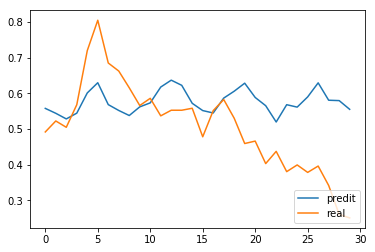

In [21]:
##Mostrem
plt.plot(predis[4], label="predit")
plt.plot(y_daily[n_train+4], label="real")
plt.legend(loc="lower right")
plt.show()

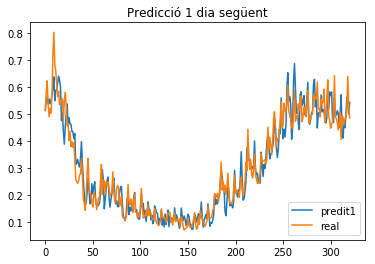

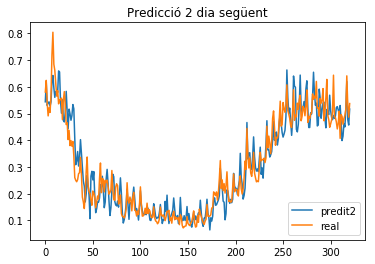

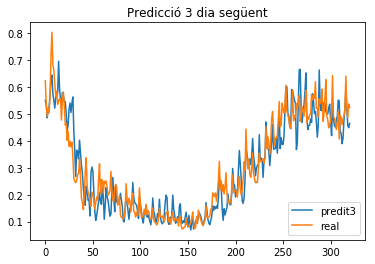

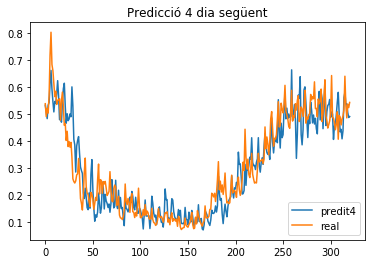

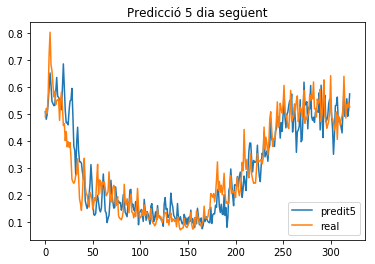

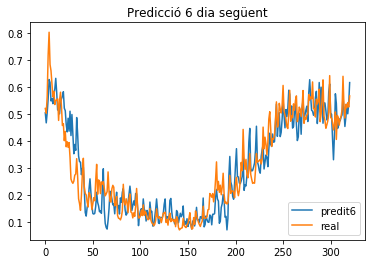

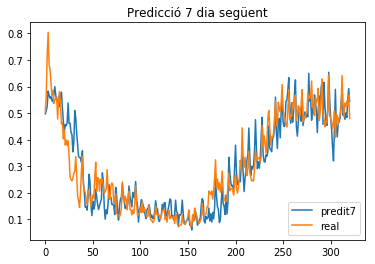

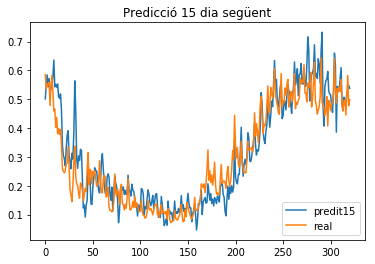

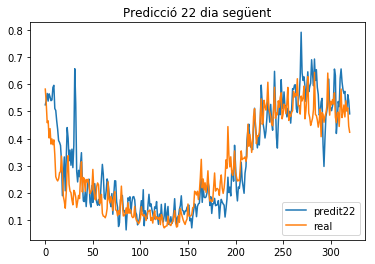

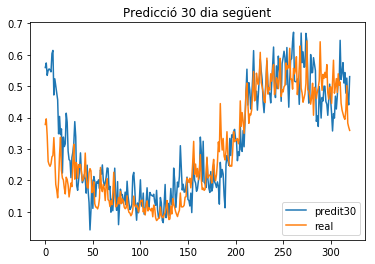

In [22]:
##Mostrem
plt.plot(llista_p0, label="predit1")
plt.plot(y_daily[n_train:lenght,0], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 1 dia següent")
plt.show()

plt.plot(llista_p1, label="predit2")
plt.plot(y_daily[n_train:lenght,1], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 2 dia següent")
plt.show()


plt.plot(llista_p2, label="predit3")
plt.plot(y_daily[n_train:lenght,2], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 3 dia següent")
plt.show()

plt.plot(llista_p3, label="predit4")
plt.plot(y_daily[n_train:lenght,3], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 4 dia següent")
plt.show()

plt.plot(llista_p4, label="predit5")
plt.plot(y_daily[n_train:lenght,4], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 5 dia següent")
plt.show()

plt.plot(llista_p5, label="predit6")
plt.plot(y_daily[n_train:lenght,5], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 6 dia següent")
plt.show()

plt.plot(llista_p6, label="predit7")
plt.plot(y_daily[n_train:lenght,6], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 7 dia següent")
plt.show()

plt.plot(llista_p14, label="predit15")
plt.plot(y_daily[n_train:lenght,14], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 15 dia següent")
plt.show()

plt.plot(llista_p21, label="predit22")
plt.plot(y_daily[n_train:lenght,21], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 22 dia següent")
plt.show()

plt.plot(llista_p29, label="predit30")
plt.plot(y_daily[n_train:lenght,29], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 30 dia següent")
plt.show()

In [12]:
llista_scores

[0.0032813839690737368,
 0.08255193851794984,
 0.0045423211984649825,
 0.018203012090584503,
 0.01737050278037433,
 0.06542844147766158,
 0.033085725603486216,
 0.01214984558724641,
 0.10088646822462355,
 0.05175425053279037,
 0.03787588832020816,
 0.05282771697474975,
 0.09515512448993624,
 0.08068377226597367,
 0.024253962991972466,
 0.12456723948404158,
 0.11994353720004236,
 0.041703484570434934,
 0.10958477289329593,
 0.07900614090861402,
 0.027063930434184202,
 0.08668039456569221,
 0.052258605764777366,
 0.003057256599590996,
 0.04910935473916056,
 0.029648361342025975,
 0.051468917015615734,
 0.07469426873470875,
 0.025508984924089262,
 0.009637255655596144,
 0.03198025786178205,
 0.11936924995331033,
 0.05718683305165384,
 0.03419454565852442,
 0.03604222238352728,
 0.05057381025897967,
 0.052208985190217216,
 0.0497259735328508,
 0.007968141136309947,
 0.014890693804721522,
 0.03473343778513882,
 0.03228406931546346,
 0.04971166577904973,
 0.020865291577815803,
 0.04814991003

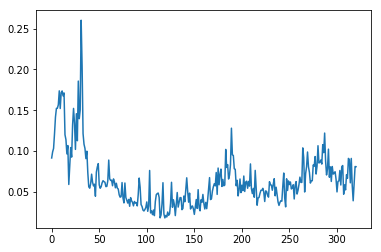

In [23]:
plt.plot(llista_scores)

In [34]:


prova=daily_dia.iloc[n_train:lenght]
prova
#len(predis)
#lenght-n_train
#prova['predi']=predis
prova['predi1']=llista_p0
prova['predi2']=llista_p1
prova['predi3']=llista_p2
prova['predi4']=llista_p3
prova['predi5']=llista_p4
prova['predi6']=llista_p5
prova['predi7']=llista_p6
prova['predi8']=llista_p7
prova['predi9']=llista_p8
prova['predi10']=llista_p9
prova['predi11']=llista_p10
prova['predi12']=llista_p11
prova['predi13']=llista_p12
prova['predi14']=llista_p13
prova['predi15']=llista_p14
prova['predi16']=llista_p15
prova['predi17']=llista_p16
prova['predi18']=llista_p17
prova['predi19']=llista_p18
prova['predi20']=llista_p19
prova['predi21']=llista_p20
prova['predi22']=llista_p21
prova['predi23']=llista_p22
prova['predi24']=llista_p23
prova['predi25']=llista_p24
prova['predi26']=llista_p25
prova['predi27']=llista_p26
prova['predi28']=llista_p27
prova['predi29']=llista_p28
prova['predi30']=llista_p29




prova['y1']=y_daily[n_train:lenght,0]
prova['y2']=y_daily[n_train:lenght,1]
prova['y3']=y_daily[n_train:lenght,2]
prova['y4']=y_daily[n_train:lenght,3]
prova['y5']=y_daily[n_train:lenght,4]
prova['y6']=y_daily[n_train:lenght,5]
prova['y7']=y_daily[n_train:lenght,6]
prova['y8']=y_daily[n_train:lenght,7]
prova['y9']=y_daily[n_train:lenght,8]
prova['y10']=y_daily[n_train:lenght,9]
prova['y11']=y_daily[n_train:lenght,10]
prova['y12']=y_daily[n_train:lenght,11]
prova['y13']=y_daily[n_train:lenght,12]
prova['y14']=y_daily[n_train:lenght,13]
prova['y15']=y_daily[n_train:lenght,14]
prova['y16']=y_daily[n_train:lenght,15]
prova['y17']=y_daily[n_train:lenght,16]
prova['y18']=y_daily[n_train:lenght,17]
prova['y19']=y_daily[n_train:lenght,18]
prova['y20']=y_daily[n_train:lenght,19]
prova['y21']=y_daily[n_train:lenght,20]
prova['y22']=y_daily[n_train:lenght,21]
prova['y23']=y_daily[n_train:lenght,22]
prova['y24']=y_daily[n_train:lenght,23]
prova['y25']=y_daily[n_train:lenght,24]
prova['y26']=y_daily[n_train:lenght,25]
prova['y27']=y_daily[n_train:lenght,26]
prova['y28']=y_daily[n_train:lenght,27]
prova['y29']=y_daily[n_train:lenght,28]
prova['y30']=y_daily[n_train:lenght,29]




prova=prova.drop(['energy_sum','t-1','t-2','t-3', 't-4', 't-5', 't-6', 't-7','t-8','t-9','t-10','t-11','t-12','t-13','t-14',], axis=1)
prova

prova1=prova[['predi1','predi2','predi3','predi4','predi5','predi6','predi7','predi8','predi9','predi10','predi11','predi12','predi13','predi14','y1','y2','y3','y4','y5','y6','y7','y8','y9','y10','y11','y12','y13','y14','y15','y16','y17','y18','y19','y20','y21','y22','y23','y24','y25','y26','y27','y28','y29','y30','y30','temp(t-1)','temp(t-2)','temp(t-3)','temp(t-4)','temp(t-5)','temp(t-6)','temp(t-7)','temp(t-8)','temp(t-9)','temp(t-10)','temp(t-11)','temp(t-12)','temp(t-13)','temp(t-14)','tempmin(t-1)','tempmin(t-2)','tempmin(t-3)','tempmin(t-4)','tempmin(t-5)','tempmin(t-6)','tempmin(t-7)','tempmin(t-8)','tempmin(t-9)','tempmin(t-10)','tempmin(t-11)','tempmin(t-12)','tempmin(t-13)','tempmin(t-14)','humidity(t-1)','humidity(t-2)','humidity(t-3)','humidity(t-4)','humidity(t-5)','humidity(t-6)','humidity(t-7)','humidity(t-8)','humidity(t-9)','humidity(t-10)','humidity(t-11)','humidity(t-12)','humidity(t-13)','humidity(t-14)','weekday(t-1)','weekday(t-2)','weekday(t-3)','weekday(t-4)','weekday(t-5)','weekday(t-6)','weekday(t-7)','weekday(t-8)','weekday(t-9)','weekday(t-10)','weekday(t-11)','weekday(t-12)','weekday(t-13)','weekday(t-14)']]
prova

prova2=prova[['predi15','predi16','predi17','predi18','predi19','predi20','predi21','predi22','predi23','predi24','predi25','predi26','predi27','predi28','predi29','predi30','y3','y4','y5','y6','y7','y8','y9','y10','y11','y12','y13','y14','y15','y16','y17','y18','y19','y20','y21','y22','y23','y24','y25','y26','y27','y28','y29','y30','y30','temp(t-1)','temp(t-2)','temp(t-3)','temp(t-4)','temp(t-5)','temp(t-6)','temp(t-7)','temp(t-8)','temp(t-9)','temp(t-10)','temp(t-11)','temp(t-12)','temp(t-13)','temp(t-14)','tempmin(t-1)','tempmin(t-2)','tempmin(t-3)','tempmin(t-4)','tempmin(t-5)','tempmin(t-6)','tempmin(t-7)','tempmin(t-8)','tempmin(t-9)','tempmin(t-10)','tempmin(t-11)','tempmin(t-12)','tempmin(t-13)','tempmin(t-14)','humidity(t-1)','humidity(t-2)','humidity(t-3)','humidity(t-4)','humidity(t-5)','humidity(t-6)','humidity(t-7)','humidity(t-8)','humidity(t-9)','humidity(t-10)','humidity(t-11)','humidity(t-12)','humidity(t-13)','humidity(t-14)','weekday(t-1)','weekday(t-2)','weekday(t-3)','weekday(t-4)','weekday(t-5)','weekday(t-6)','weekday(t-7)','weekday(t-8)','weekday(t-9)','weekday(t-10)','weekday(t-11)','weekday(t-12)','weekday(t-13)','weekday(t-14)']]

c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [35]:
# Convert predictions back to normal values

predi = scaler.inverse_transform(prova1)
predi2= scaler.inverse_transform(prova2)

print(predi)
#0-6 predi
print(predi[0][0])
print(predi[0][1])
print(predi[0][2])
print(predi[0][3])
print(predi[0][4])
print(predi[0][5])
print(predi[0][6])

#7-13 y

print(predi[0][7])
print(predi[0][8])
print(predi[0][9])
print(predi[0][10])
print(predi[0][11])
print(predi[0][12])
print(predi[0][13])


[[11.61714607 11.86003432 11.92502777 ... 43.         37.
  31.        ]
 [11.95241713 12.50351572 11.78167322 ...  7.         43.
  37.        ]
 [12.03449345 11.73573976 11.34047005 ... 13.          7.
  43.        ]
 ...
 [11.98689497 11.26904698 11.08412265 ... 13.          7.
  43.        ]
 [11.47801783 11.08011534 11.01210341 ... 19.         13.
   7.        ]
 [11.86803613 11.61663605 11.15606507 ... 25.         19.
  13.        ]]
11.617146068427322
11.86003432218781
11.92502777084354
11.765061420313916
11.552275322400654
11.517660910742073
11.443103058895751
11.420755442460443
11.889737961235424
12.289155291442706
11.7473981101155
11.548683336307267
11.482296946066828
11.540345959407304


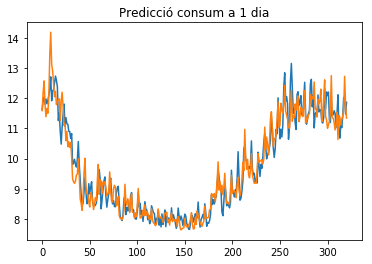

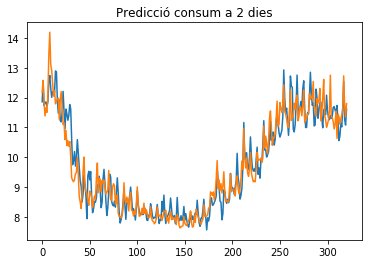

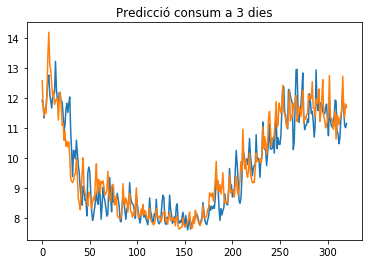

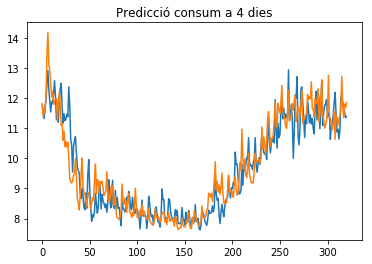

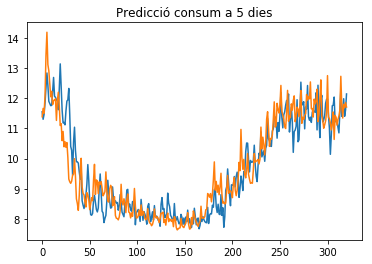

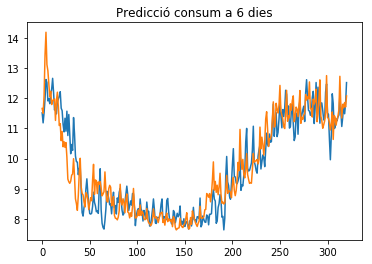

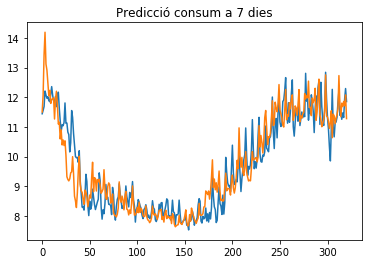

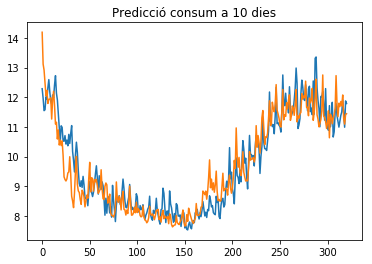

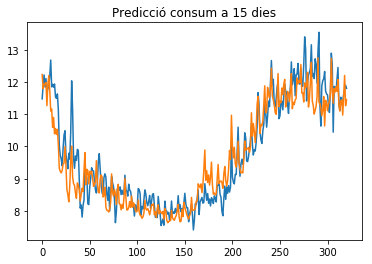

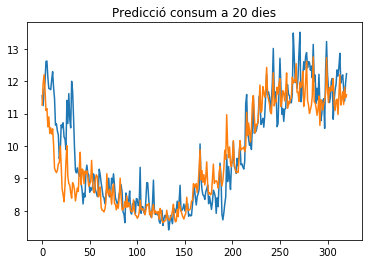

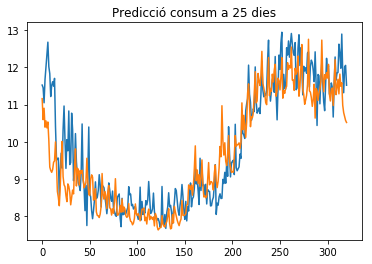

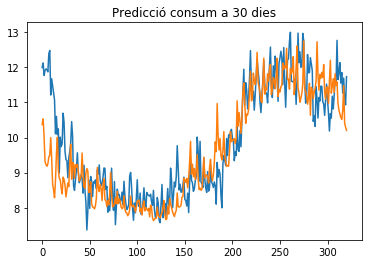

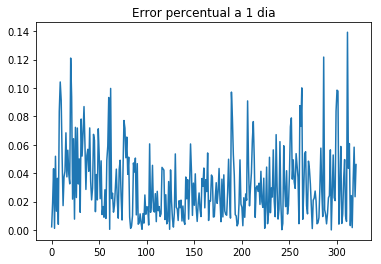

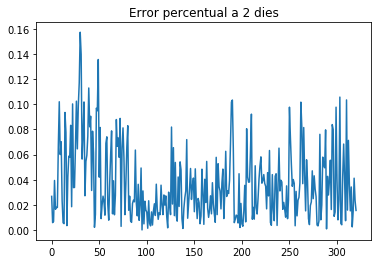

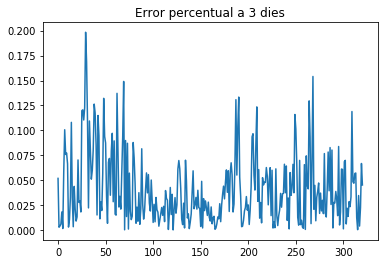

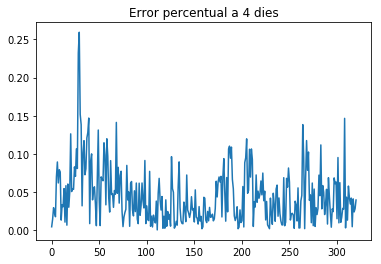

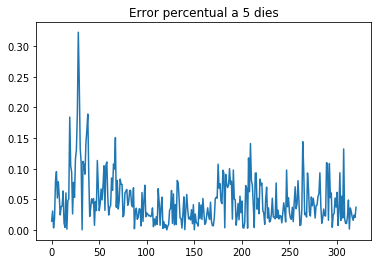

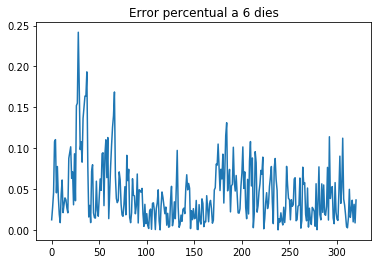

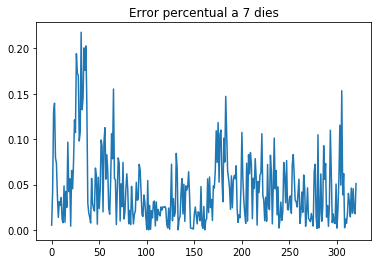

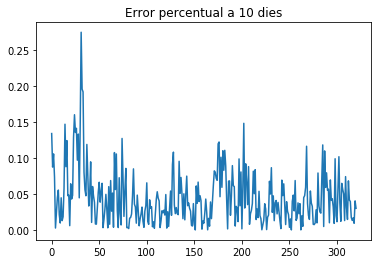

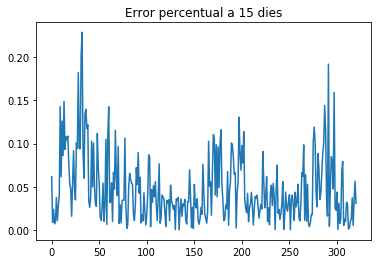

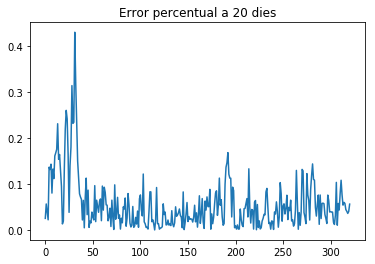

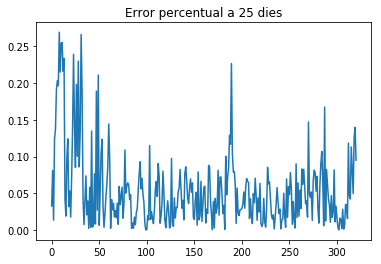

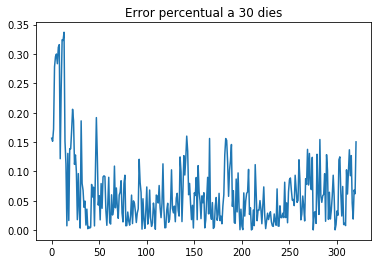

L'error mitjà a 1 dia és de 3.201301904539095 % 
L'error mitjà a 2 dies és de 3.695479031626149 % 
L'error mitjà a 3 dies és de 4.13242978174084 % 
L'error mitjà a 4 dies és de 4.4861972085003625 % 
L'error mitjà a 5 dies és de 4.741936371808464 % 
L'error mitjà a 6 dies és de 4.515537597028588 % 
L'error mitjà a 7 dies és de 4.502326551129249 % 
L'error mitjà a 10 dies és de 4.492387138130774 % 
L'error mitjà a 15 dies és de 4.736990140327543 % 
L'error mitjà a 20 dies és de 5.587884468908786 % 
L'error mitjà a 25 dies és de 5.479946538037582 % 
L'error mitjà a 30 dies és de 6.337070606244632 % 


In [44]:
llista1=list()
llista2=list()
llista3=list()
llista4=list()
llista5=list()
llista6=list()
llista7=list()
llista8=list()
llista9=list()
llista10=list()
llista11=list()
llista12=list()
llista13=list()
llista14=list()
llista15=list()
llista16=list()
llista17=list()
llista18=list()
llista19=list()
llista20=list()
llista21=list()
llista22=list()
llista23=list()
llista24=list()
llista25=list()
llista26=list()
llista27=list()
llista28=list()
llista29=list()
llista30=list()

llistay1=list()
llistay2=list()
llistay3=list()
llistay4=list()
llistay5=list()
llistay6=list()
llistay7=list()
llistay8=list()
llistay9=list()
llistay10=list()
llistay11=list()
llistay12=list()
llistay13=list()
llistay14=list()
llistay15=list()
llistay16=list()
llistay17=list()
llistay18=list()
llistay19=list()
llistay20=list()
llistay21=list()
llistay22=list()
llistay23=list()
llistay24=list()
llistay25=list()
llistay26=list()
llistay27=list()
llistay28=list()
llistay29=list()
llistay30=list()


llista_errors1=list()
llista_errorsabs1=list()
llista_errorsres1=list()


llista_errors2=list()
llista_errorsabs2=list()
llista_errorsres2=list()


llista_errors3=list()
llista_errorsabs3=list()
llista_errorsres3=list()

llista_errors4=list()
llista_errorsabs4=list()
llista_errorsres4=list()

llista_errors5=list()
llista_errorsabs5=list()
llista_errorsres5=list()

llista_errors6=list()
llista_errorsabs6=list()
llista_errorsres6=list()

llista_errors7=list()
llista_errorsabs7=list()
llista_errorsres7=list()

llista_errors10=list()
llista_errorsabs10=list()
llista_errorsres10=list()

llista_errors15=list()
llista_errorsabs15=list()
llista_errorsres15=list()

llista_errors20=list()
llista_errorsabs20=list()
llista_errorsres20=list()

llista_errors25=list()
llista_errorsabs25=list()
llista_errorsres25=list()

llista_errors30=list()
llista_errorsabs30=list()
llista_errorsres30=list()


llista_errorsres8=list()
llista_errorsres9=list()
llista_errorsres11=list()
llista_errorsres12=list()
llista_errorsres13=list()
llista_errorsres14=list()
llista_errorsres16=list()
llista_errorsres17=list()
llista_errorsres18=list()
llista_errorsres19=list()
llista_errorsres21=list()
llista_errorsres22=list()
llista_errorsres23=list()
llista_errorsres24=list()
llista_errorsres26=list()
llista_errorsres27=list()
llista_errorsres28=list()
llista_errorsres29=list()
    
for i in range(len(predi)):
    
    llista1.append(predi[i][0])
    llista2.append(predi[i][1])
    llista3.append(predi[i][2])
    llista4.append(predi[i][3])
    llista5.append(predi[i][4])
    llista6.append(predi[i][5])
    llista7.append(predi[i][6])
    llista8.append(predi[i][7])
    llista9.append(predi[i][8])
    llista10.append(predi[i][9])
    llista11.append(predi[i][10])
    llista12.append(predi[i][11])
    llista13.append(predi[i][12])
    llista14.append(predi[i][13])
    
    llistay1.append(predi[i][14])
    llistay2.append(predi[i][15])
    llistay3.append(predi[i][16])
    llistay4.append(predi[i][17])
    llistay5.append(predi[i][18])
    llistay6.append(predi[i][19])
    llistay7.append(predi[i][20])
    llistay8.append(predi[i][21])
    llistay9.append(predi[i][22])
    llistay10.append(predi[i][23])
    llistay11.append(predi[i][24])
    llistay12.append(predi[i][25])
    llistay13.append(predi[i][26])
    llistay14.append(predi[i][27])
    llistay15.append(predi[i][28])
    llistay16.append(predi[i][29])
    llistay17.append(predi[i][30])
    llistay18.append(predi[i][31])
    llistay19.append(predi[i][32]) 
    llistay20.append(predi[i][33])
    llistay21.append(predi[i][34])
    llistay22.append(predi[i][35])
    llistay23.append(predi[i][36])
    llistay24.append(predi[i][37])
    llistay25.append(predi[i][38])
    llistay26.append(predi[i][39])
    llistay27.append(predi[i][40])
    llistay28.append(predi[i][41])
    llistay29.append(predi[i][42])
    llistay30.append(predi[i][43])
   
    llista15.append(predi2[i][0])
    llista16.append(predi2[i][1])
    llista17.append(predi2[i][2])
    llista18.append(predi2[i][3])
    llista19.append(predi2[i][4])
    llista20.append(predi2[i][5])
    llista21.append(predi2[i][6])
    llista22.append(predi2[i][7])
    llista23.append(predi2[i][8])
    llista24.append(predi2[i][9])
    llista25.append(predi2[i][10])
    llista26.append(predi2[i][11])
    llista27.append(predi2[i][12])
    llista28.append(predi2[i][13]) 
    llista29.append(predi2[i][14])    
    llista30.append(predi2[i][15]) 
    
    
    
    valor1=llistay1[i] - llista1[i]
    valorabs1=math.fabs(valor1)
    valorrespecte1=valorabs1/llistay1[i]
    llista_errors1.append(valor1)
    llista_errorsabs1.append(valorabs1)
    llista_errorsres1.append(valorrespecte1)
    
    valor2=llistay2[i] - llista2[i]
    valorabs2=math.fabs(valor2)
    valorrespecte2=valorabs2/llistay2[i]
    llista_errors2.append(valor2)
    llista_errorsabs2.append(valorabs2)
    llista_errorsres2.append(valorrespecte2)
    
    valor3=llistay3[i] - llista3[i]
    valorabs3=math.fabs(valor3)
    valorrespecte3=valorabs3/llistay3[i]
    llista_errors3.append(valor3)
    llista_errorsabs3.append(valorabs3)
    llista_errorsres3.append(valorrespecte3)
    
    valor4=llistay4[i] - llista4[i]
    valorabs4=math.fabs(valor4)
    valorrespecte4=valorabs4/llistay4[i]
    llista_errors4.append(valor4)
    llista_errorsabs4.append(valorabs4)
    llista_errorsres4.append(valorrespecte4)
    
    valor5=llistay5[i] - llista5[i]
    valorabs5=math.fabs(valor5)
    valorrespecte5=valorabs5/llistay5[i]
    llista_errors5.append(valor5)
    llista_errorsabs5.append(valorabs5)
    llista_errorsres5.append(valorrespecte5)
    
    valor6=llistay6[i] - llista6[i]
    valorabs6=math.fabs(valor6)
    valorrespecte6=valorabs6/llistay6[i]
    llista_errors6.append(valor6)
    llista_errorsabs6.append(valorabs6)
    llista_errorsres6.append(valorrespecte6)
    
    valor7=llistay7[i] - llista7[i]
    valorabs7=math.fabs(valor7)
    valorrespecte7=valorabs7/llistay7[i]
    llista_errors7.append(valor7)
    llista_errorsabs7.append(valorabs7)
    llista_errorsres7.append(valorrespecte7)
    
    valor8=llistay8[i] - llista8[i]
    valorabs8=math.fabs(valor8)
    valorrespecte8=valorabs8/llistay8[i]
    llista_errorsres8.append(valorrespecte8)
    
    valor9=llistay9[i] - llista9[i]
    valorabs9=math.fabs(valor9)
    valorrespecte9=valorabs9/llistay9[i]
    llista_errorsres9.append(valorrespecte9)


    
    valor10=llistay10[i] - llista10[i]
    valorabs10=math.fabs(valor10)
    valorrespecte10=valorabs10/llistay10[i]
    llista_errors10.append(valor10)
    llista_errorsabs10.append(valorabs10)
    llista_errorsres10.append(valorrespecte10)
    
    valor11=llistay11[i] - llista11[i]
    valorabs11=math.fabs(valor11)
    valorrespecte11=valorabs11/llistay11[i]
    llista_errorsres11.append(valorrespecte11)
    
    valor12=llistay12[i] - llista12[i]
    valorabs12=math.fabs(valor12)
    valorrespecte12=valorabs12/llistay12[i]
    llista_errorsres12.append(valorrespecte12)
    
    valor13=llistay13[i] - llista13[i]
    valorabs13=math.fabs(valor13)
    valorrespecte13=valorabs13/llistay13[i]
    llista_errorsres13.append(valorrespecte13)
    
    valor14=llistay14[i] - llista14[i]
    valorabs14=math.fabs(valor14)
    valorrespecte14=valorabs14/llistay14[i]
    llista_errorsres14.append(valorrespecte14)
    
    valor15=llistay15[i] - llista15[i]
    valorabs15=math.fabs(valor15)
    valorrespecte15=valorabs15/llistay15[i]
    llista_errors15.append(valor15)
    llista_errorsabs15.append(valorabs15)
    llista_errorsres15.append(valorrespecte15)
    
    valor16=llistay16[i] - llista16[i]
    valorabs16=math.fabs(valor16)
    valorrespecte16=valorabs16/llistay16[i]
    llista_errorsres16.append(valorrespecte16)
    
    valor17=llistay17[i] - llista17[i]
    valorabs17=math.fabs(valor17)
    valorrespecte17=valorabs17/llistay17[i]
    llista_errorsres17.append(valorrespecte17)
    
    valor18=llistay18[i] - llista18[i]
    valorabs18=math.fabs(valor18)
    valorrespecte18=valorabs18/llistay18[i]
    llista_errorsres18.append(valorrespecte18)
    
    valor19=llistay19[i] - llista19[i]
    valorabs19=math.fabs(valor19)
    valorrespecte19=valorabs19/llistay19[i]
    llista_errorsres19.append(valorrespecte19)
    
    valor20=llistay20[i] - llista20[i]
    valorabs20=math.fabs(valor20)
    valorrespecte20=valorabs20/llistay20[i]
    llista_errors20.append(valor20)
    llista_errorsabs20.append(valorabs20)
    llista_errorsres20.append(valorrespecte20)
    
    valor21=llistay21[i] - llista21[i]
    valorabs21=math.fabs(valor21)
    valorrespecte21=valorabs21/llistay21[i]
    llista_errorsres21.append(valorrespecte21)
    
    
    valor22=llistay22[i] - llista22[i]
    valorabs22=math.fabs(valor22)
    valorrespecte22=valorabs22/llistay22[i]
    llista_errorsres22.append(valorrespecte22)
    
    valor23=llistay23[i] - llista23[i]
    valorabs23=math.fabs(valor23)
    valorrespecte23=valorabs23/llistay23[i]
    llista_errorsres23.append(valorrespecte23)
    
    valor24=llistay24[i] - llista24[i]
    valorabs24=math.fabs(valor24)
    valorrespecte24=valorabs24/llistay24[i]
    llista_errorsres24.append(valorrespecte24)

    
    
    
    valor25=llistay25[i] - llista25[i]
    valorabs25=math.fabs(valor25)
    valorrespecte25=valorabs25/llistay25[i]
    llista_errors25.append(valor25)
    llista_errorsabs25.append(valorabs25)
    llista_errorsres25.append(valorrespecte25)
    
    valor26=llistay26[i] - llista26[i]
    valorabs26=math.fabs(valor26)
    valorrespecte26=valorabs26/llistay26[i]
    llista_errorsres26.append(valorrespecte26)
    
    valor27=llistay27[i] - llista27[i]
    valorabs27=math.fabs(valor27)
    valorrespecte27=valorabs27/llistay27[i]
    llista_errorsres27.append(valorrespecte27)
    
    valor28=llistay28[i] - llista28[i]
    valorabs28=math.fabs(valor28)
    valorrespecte28=valorabs28/llistay28[i]
    llista_errorsres28.append(valorrespecte28)
    
    valor29=llistay29[i] - llista29[i]
    valorabs29=math.fabs(valor29)
    valorrespecte29=valorabs29/llistay29[i]
    llista_errorsres29.append(valorrespecte29)
    
     
    
    
    
    valor30=llistay30[i] - llista30[i]
    valorabs30=math.fabs(valor30)
    valorrespecte30=valorabs30/llistay30[i]
    llista_errors30.append(valor30)
    llista_errorsabs30.append(valorabs30)
    llista_errorsres30.append(valorrespecte30)
    
    
    
plt.plot(llista1)
plt.plot(llistay1)
plt.title("Predicció consum a 1 dia")
plt.show()

plt.plot(llista2)
plt.plot(llistay2)
plt.title("Predicció consum a 2 dies")
plt.show()

plt.plot(llista3)
plt.plot(llistay3)
plt.title("Predicció consum a 3 dies")
plt.show()

plt.plot(llista4)
plt.plot(llistay4)
plt.title("Predicció consum a 4 dies")
plt.show()

plt.plot(llista5)
plt.plot(llistay5)
plt.title("Predicció consum a 5 dies")
plt.show()

plt.plot(llista6)
plt.plot(llistay6)
plt.title("Predicció consum a 6 dies")
plt.show()

plt.plot(llista7)
plt.plot(llistay7)
plt.title("Predicció consum a 7 dies")
plt.show()

plt.plot(llista10)
plt.plot(llistay10)
plt.title("Predicció consum a 10 dies")
plt.show()

plt.plot(llista15)
plt.plot(llistay15)
plt.title("Predicció consum a 15 dies")
plt.show()

plt.plot(llista20)
plt.plot(llistay20)
plt.title("Predicció consum a 20 dies")
plt.show()

plt.plot(llista25)
plt.plot(llistay25)
plt.title("Predicció consum a 25 dies")
plt.show()

plt.plot(llista30)
plt.plot(llistay30)
plt.title("Predicció consum a 30 dies")
plt.show()


plt.plot(llista_errorsres1)
plt.title("Error percentual a 1 dia")
plt.show()
plt.plot(llista_errorsres2)
plt.title("Error percentual a 2 dies")
plt.show()
plt.plot(llista_errorsres3)
plt.title("Error percentual a 3 dies")
plt.show()
plt.plot(llista_errorsres4)
plt.title("Error percentual a 4 dies")
plt.show()
plt.plot(llista_errorsres5)
plt.title("Error percentual a 5 dies")
plt.show()
plt.plot(llista_errorsres6)
plt.title("Error percentual a 6 dies")
plt.show()
plt.plot(llista_errorsres7)
plt.title("Error percentual a 7 dies")
plt.show()
plt.plot(llista_errorsres10)
plt.title("Error percentual a 10 dies")
plt.show()
plt.plot(llista_errorsres15)
plt.title("Error percentual a 15 dies")
plt.show()
plt.plot(llista_errorsres20)
plt.title("Error percentual a 20 dies")
plt.show()
plt.plot(llista_errorsres25)
plt.title("Error percentual a 25 dies")
plt.show()
plt.plot(llista_errorsres30)
plt.title("Error percentual a 30 dies")
plt.show()


error_mitja1=sum(llista_errorsres1)/(len(llista_errorsres1))*100
error_mitja2=sum(llista_errorsres2)/(len(llista_errorsres2))*100
error_mitja3=sum(llista_errorsres3)/(len(llista_errorsres3))*100
error_mitja4=sum(llista_errorsres4)/(len(llista_errorsres4))*100
error_mitja5=sum(llista_errorsres5)/(len(llista_errorsres5))*100
error_mitja6=sum(llista_errorsres6)/(len(llista_errorsres6))*100
error_mitja7=sum(llista_errorsres7)/(len(llista_errorsres7))*100
error_mitja8=sum(llista_errorsres8)/(len(llista_errorsres8))*100
error_mitja9=sum(llista_errorsres9)/(len(llista_errorsres9))*100
error_mitja10=sum(llista_errorsres10)/(len(llista_errorsres10))*100
error_mitja11=sum(llista_errorsres11)/(len(llista_errorsres11))*100
error_mitja12=sum(llista_errorsres12)/(len(llista_errorsres12))*100
error_mitja13=sum(llista_errorsres13)/(len(llista_errorsres13))*100
error_mitja14=sum(llista_errorsres14)/(len(llista_errorsres14))*100

error_mitja15=sum(llista_errorsres15)/(len(llista_errorsres15))*100
error_mitja16=sum(llista_errorsres16)/(len(llista_errorsres16))*100
error_mitja17=sum(llista_errorsres17)/(len(llista_errorsres17))*100
error_mitja18=sum(llista_errorsres18)/(len(llista_errorsres18))*100
error_mitja19=sum(llista_errorsres19)/(len(llista_errorsres19))*100

error_mitja20=sum(llista_errorsres20)/(len(llista_errorsres20))*100
error_mitja21=sum(llista_errorsres21)/(len(llista_errorsres21))*100
error_mitja22=sum(llista_errorsres22)/(len(llista_errorsres22))*100
error_mitja23=sum(llista_errorsres23)/(len(llista_errorsres23))*100
error_mitja24=sum(llista_errorsres24)/(len(llista_errorsres24))*100
error_mitja25=sum(llista_errorsres25)/(len(llista_errorsres25))*100
error_mitja26=sum(llista_errorsres26)/(len(llista_errorsres26))*100
error_mitja27=sum(llista_errorsres27)/(len(llista_errorsres27))*100
error_mitja28=sum(llista_errorsres28)/(len(llista_errorsres28))*100
error_mitja29=sum(llista_errorsres29)/(len(llista_errorsres29))*100
error_mitja30=sum(llista_errorsres30)/(len(llista_errorsres30))*100

print("L'error mitjà a 1 dia és de {} % " .format(error_mitja1))
print("L'error mitjà a 2 dies és de {} % " .format(error_mitja2))
print("L'error mitjà a 3 dies és de {} % " .format(error_mitja3))
print("L'error mitjà a 4 dies és de {} % " .format(error_mitja4))
print("L'error mitjà a 5 dies és de {} % " .format(error_mitja5))
print("L'error mitjà a 6 dies és de {} % " .format(error_mitja6))
print("L'error mitjà a 7 dies és de {} % " .format(error_mitja7))
print("L'error mitjà a 10 dies és de {} % " .format(error_mitja10))
print("L'error mitjà a 15 dies és de {} % " .format(error_mitja15))
print("L'error mitjà a 20 dies és de {} % " .format(error_mitja20))
print("L'error mitjà a 25 dies és de {} % " .format(error_mitja25))
print("L'error mitjà a 30 dies és de {} % " .format(error_mitja30))

In [45]:
(error_mitja1+error_mitja2+error_mitja3+error_mitja4+error_mitja5+error_mitja6+error_mitja7+error_mitja8+error_mitja9+error_mitja10+error_mitja11+error_mitja12+error_mitja13+error_mitja14+error_mitja15+error_mitja16+error_mitja17+error_mitja18+error_mitja19+error_mitja20+error_mitja21+error_mitja22+error_mitja23+error_mitja24+error_mitja25+error_mitja26+error_mitja27+error_mitja28+error_mitja29+error_mitja30)/30

4.956957474043554